In [1]:
import os
import numpy as np
import mne
import matplotlib.pyplot as plt  

In [2]:
current_folder = os.getcwd()
# root_folder = os.path.dirname(current_folder)
print(current_folder)
# print(root_folder)

C:\Users\Shizhe\brain_data\AudVisRhythm\data\code


In [3]:
# preload=True # (or string) in the constructor or raw.load_data()
subject = 'sub-004'
raw_file = os.path.join(current_folder, subject+'_eeg_processed_raw.fif')
print(raw_file)

C:\Users\Shizhe\brain_data\AudVisRhythm\data\code\sub-004_eeg_processed_raw.fif


In [4]:
# event_id = {"rt": 1, "square": 2}  # must be specified for str events
raw = mne.io.read_raw_fif(raw_file)
#orig_raw = raw.copy()
raw.load_data()

Opening raw data file C:\Users\Shizhe\brain_data\AudVisRhythm\data\code\sub-004_eeg_processed_raw.fif...
    Range : 0 ... 809798 =      0.000 ...  3163.273 secs
Ready.
Reading 0 ... 809798  =      0.000 ...  3163.273 secs...


<Raw  |  sub-004_eeg_processed_raw.fif, n_channels x n_times : 32 x 809799 (3163.3 sec), ~197.8 MB, data loaded>

%matplotlib inline
raw.plot_psd(fmax=150, tmax=200)
raw.plot(duration=60, start=1000, n_channels=32);

# Detecting experimental events

In [5]:
from mne.event import define_target_events
from mne.channels import make_1020_channel_selections

In [6]:
#"1":2 "Visual flash during visual omission condtion",
#"2":3 "Omitted Flash during visual omission condition",
#"3":4 "Auditory tone during auditory omission condition",
#"4":5 "Omitted tone during auditory omission condition",
#"5":6 "Visual Flash during visual non-omission/control condition",
#"6":7 "Auditory tone during auditory non-omission/control condition"

chs = ['FPZ','FP1','FP2']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
raw.plot(duration=30, start=140, scalings=dict(eeg=2*20e-6),order=chan_idxs, n_channels=len(chan_idxs));

In [7]:
#event_id = {'0, Impedance': 7 } #"VF": 1, "VO": 2, "AT": 3, "AO": 4, "VF-C": 5, "AT-C": 6}
#because of impedence, every event number was moved back 1
events = mne.events_from_annotations(raw)[0]
a = 0
print(events[a:a+5])   # show the first 5
# 7:Auditary Tone control | 4:Auditory tone  5:Auditory Omitted tone  
# 6:Visual Flash control  | 2:Visual Flash   3:Visual Omitted Flash

Used Annotations descriptions: ['0, Impedance', '1', '2', '3', '4', '5', '6']
[[10837     0     6]
 [10991     0     6]
 [11144     0     6]
 [11298     0     6]
 [11452     0     6]]


In [8]:
event_dict = {'auditory/stim': 4, 'auditory/omit': 5, 
              'visual/stim': 2, 'visual/omit': 3, 
              'visual/stim/control': 6, 'auditory/stim/control': 7 , 'start': 1}

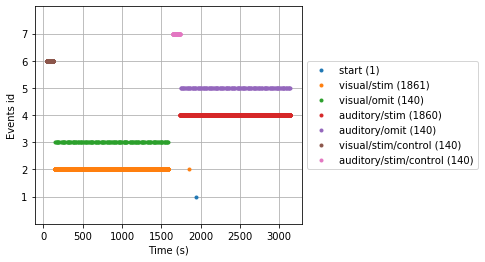

In [9]:
fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'])
fig.subplots_adjust(right=0.7)  # make room for the legend

from importlib import reload
reload(plt)
%matplotlib notebook

In [10]:
#raw.plot(duration=60, start=1000, n_channels=32);

# Epoching continuous data

In [11]:
reject_criteria = dict(eeg=120e-6) #150e-6)       # 150 μV  #eog=250e-6)       # 250 μV

In [12]:
epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.2, tmax=0.5,
                    reject=reject_criteria, preload=True)

4282 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 4282 events and 180 original time points ...
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['P4', 'P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch bas

    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2', 'T7', 'P7']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch 

    Rejecting  epoch based on EEG : ['FP1', 'FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'T7']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'T7']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'T7']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'T7']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'T7']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'T7', 'P7', 'P8']
    Rejecting  epoch based on EEG : ['FP1', 'FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FP2']
    Rejec

    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2', 'P8']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2', 'P7', 'P4']
    Rejecting  epoch based on EEG : ['FP2', 'T7', 'C4', 'P

    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2', 'P3']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'P3', 'P8']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2', 'F3', 'F4', 'CP5', 'P3']
    Rejecting  epoch based on EEG : ['FP1', 'FP2']
    Rejectin

    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2', 'P7', 'P4', 'P8']
    Rejecting  epoch based on EEG : ['FP2', 'P7', 'P8']
    Rejecting  epoch based on EEG : ['FP2', 'P7', 'P4', 'P8']
    Rejecting  epoch based on EEG : ['FP2', 'P8']
    Rejecting  epoch based on EEG : ['FP2', 'P3', 'P8']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2', 'F3']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2

    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'F3']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'P4', 'O1']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2', 'P4', 'P8']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2', 'P8']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'P7', 'P4', 'P8', 'O1']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'P8']
    Rejecting  epoch based on EEG :

    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'P4']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4', 'P8']
    Rejecting  epoch based on EEG : ['P4', 'P8']
    Rejecting  epoch based on EEG : ['P4', 'P8']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Re

    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'P4', 'P8']
    Rejecting  epoch based on EEG : ['FP2', 'P7', 'P4', 'P8']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'P3', 'P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['FP2', 'P7', 'P8']
    Rejecting  epoch based on EEG : ['FP2', 'P7', 'P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['FP2', 'P7', 'P4', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['FP2', 'P7', 'P8']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['P4', 'P8']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  ep

    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2', 'P7']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2', 'P4', 'P8']
    Rejecting  epoch based on EEG : ['FP2', 'P7', 'P4', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'P4']
    Rejecting  epoch based on EEG : ['FP2', 'P7']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2', 'P7', 'P4', 'P8']
    Rejecting  epoch based on EEG : ['FP2', 'P7']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['FP1', 'FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : 

    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P4', 'P8']
    Rejecting  epoch based on EEG : ['P4', 'P8']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'P3', 'P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2', 'P7']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FP2']
    Rejecting  epoch based on EEG

    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'P4', 'P8']
    Rejecting  epoch based on EEG : ['FP2', 'P7', 'P8', 'O1']
    Rejecting  epoch based on EEG : ['FP2', 'P8']
    Rejecting  epoch based on EEG : ['FP2', 'P8']
    Rejecting  epoch based on EEG : ['FP2', 'P8']
    Rejecting  epoch based on EEG : ['FP2', 'P7', 'P3', 'P8']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'P7', 'P8']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2', 'P7', 'P4', 'P8']
    Rejecting  epoch based on EEG : ['FP2', 'P4', 'P8']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1', 'FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based o

    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2', 'P8']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['FP2', 'P8']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2', 'P4', 'P8']
    Rejecting  epoch based on EEG : ['FP2', 'P7', 'P8']
    Rejecting  epoch based on EEG : ['FP2', 'P7']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'F4', 'P3', 'PZ', 'P4', 'POZ']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2

In [13]:
epochs.equalize_event_counts(['auditory/stim','visual/stim'])  # this operates in-place
epochs.equalize_event_counts(['auditory/omit','visual/omit']);

Dropped 107 epochs
Dropped 16 epochs


In [14]:
aud_stim_epochs = epochs['auditory/stim']
vid_stim_epochs = epochs['visual/stim']
auditory_omit_epochs = epochs['auditory/omit']
visual_omit_epochs = epochs['visual/omit']

916 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
916 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


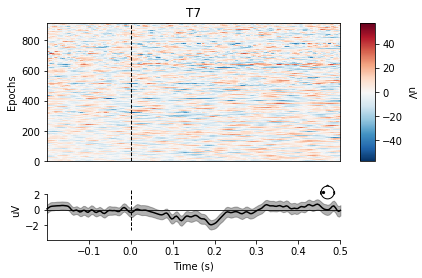

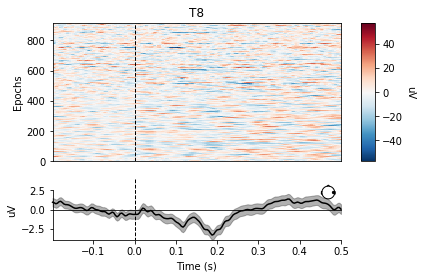

[<Figure size 432x288 with 4 Axes>, <Figure size 432x288 with 4 Axes>]

In [15]:
aud_stim_epochs.plot_image(picks=['T7','T8']) #,scalings=dict(eeg=0.5*1e6))

49 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
49 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


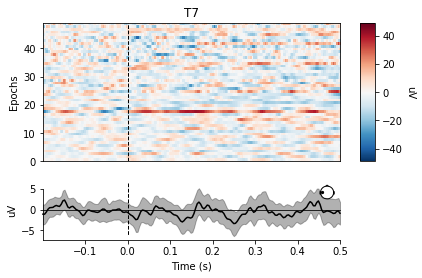

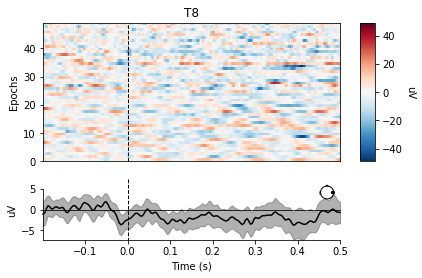

[<Figure size 432x288 with 4 Axes>, <Figure size 432x288 with 4 Axes>]

In [16]:
auditory_omit_epochs.plot_image(picks=['T7','T8'])

916 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
916 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


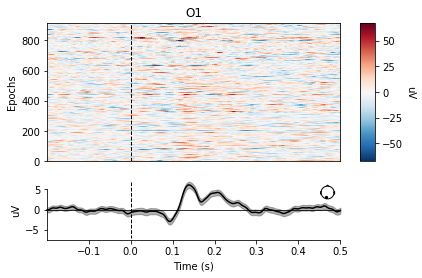

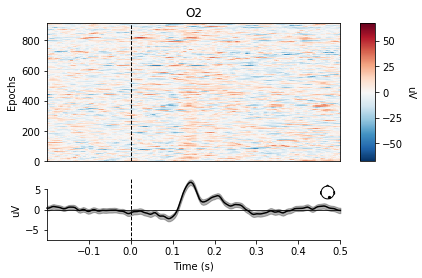

[<Figure size 432x288 with 4 Axes>, <Figure size 432x288 with 4 Axes>]

In [17]:
vid_stim_epochs.plot_image(picks=['O1','O2'])

49 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
49 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


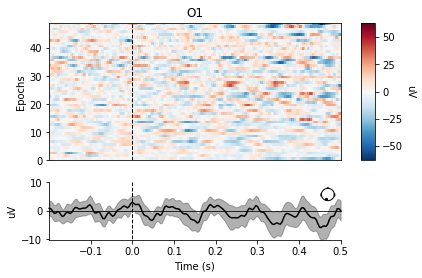

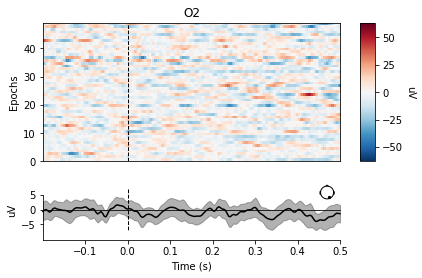

In [18]:
visual_omit_epochs.plot_image(picks=['O1','O2']); #,'OZ','POZ'])

# Estimating evoked responses

In [19]:
aud_stim_epochs = epochs['auditory/stim']
vid_stim_epochs = epochs['visual/stim']
auditory_omit_epochs = epochs['auditory/omit']
visual_omit_epochs = epochs['visual/omit']

In [20]:
aud_stim_evoked = aud_stim_epochs.average()
vis_stim_evoked = vid_stim_epochs.average()
aud_omit_evoked = auditory_omit_epochs.average()
vis_omit_evoked = visual_omit_epochs.average()


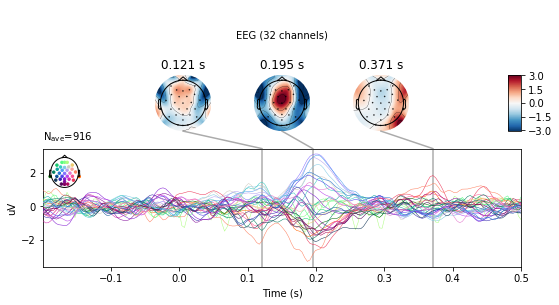

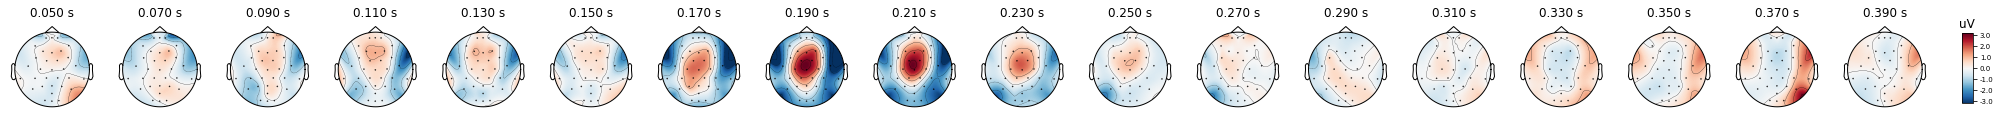

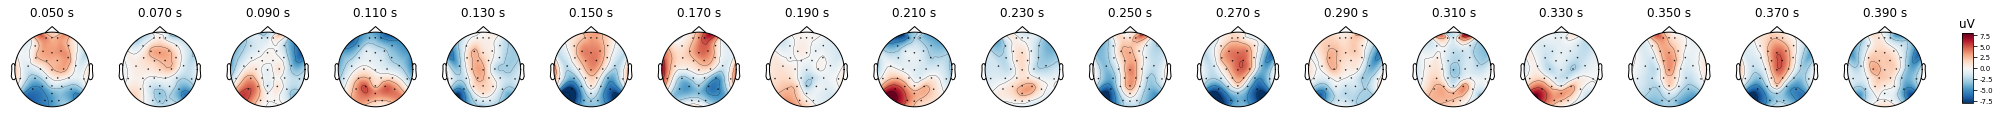

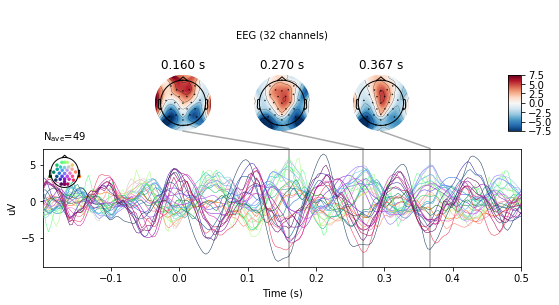

In [21]:
# playing tone at 100bpm
times = np.arange(0.05, 0.401, 0.02)
aud_stim_evoked.plot_joint()
aud_stim_evoked.plot_topomap(times)
#aud_omit_evoked.plot_joint(times=[0.082,0.125,0.188]); #,ts_args=dict(scalings=dict(eeg=1e6)));
aud_omit_evoked.plot_topomap(times);
aud_omit_evoked.plot_joint();

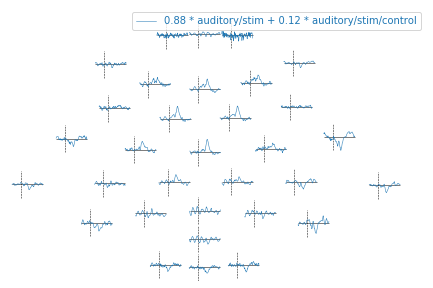

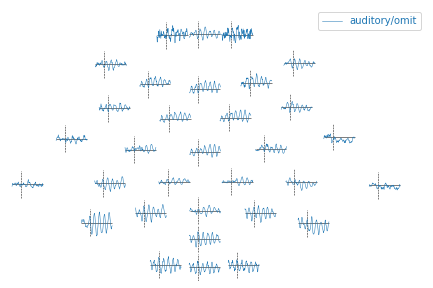

In [22]:
aud_stim_evoked.plot_topo();
aud_omit_evoked.plot_topo();

evoked_diff = mne.combine_evoked([aud_evoked, -vis_evoked], weights='equal')
evoked_diff.pick_types('mag').plot_topo(color='r', legend=False)

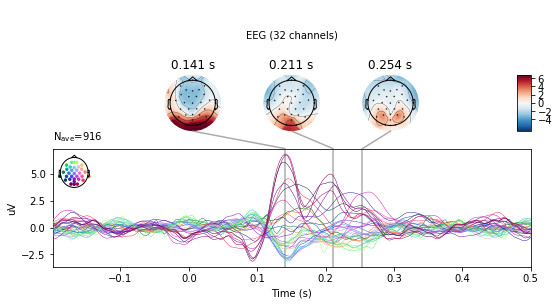

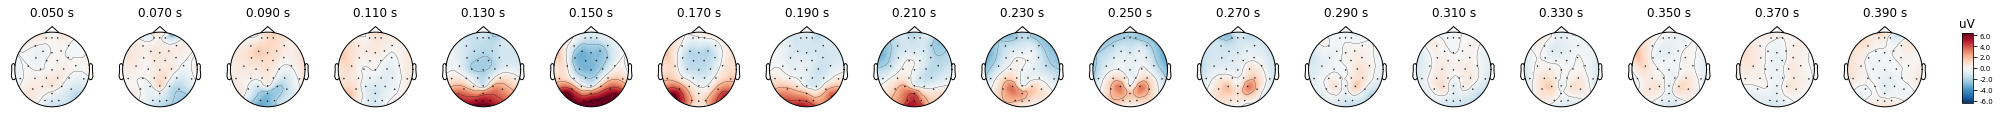

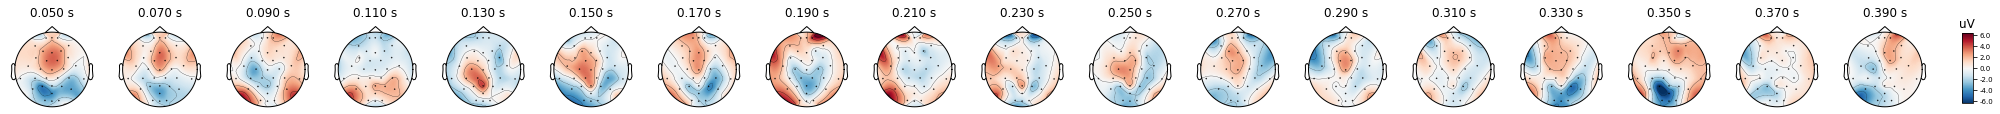

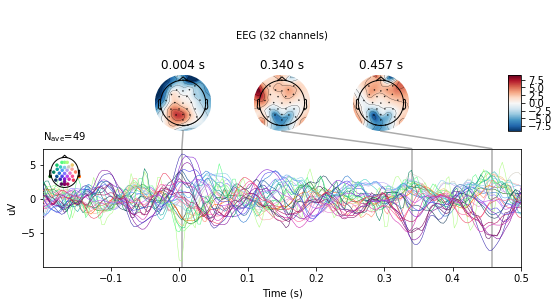

In [23]:
# flashing at 100bpm
vis_stim_evoked.plot_joint()
vis_stim_evoked.plot_topomap(times);
# vis_omit_evoked.plot_joint(times=[0.145,0.238,0.336]);
vis_omit_evoked.plot_topomap(times);
vis_omit_evoked.plot_joint();

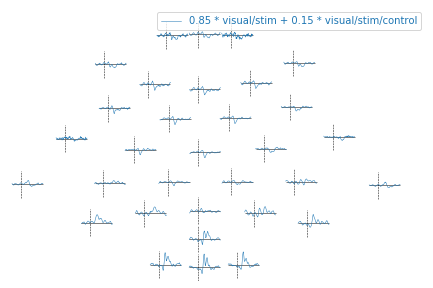

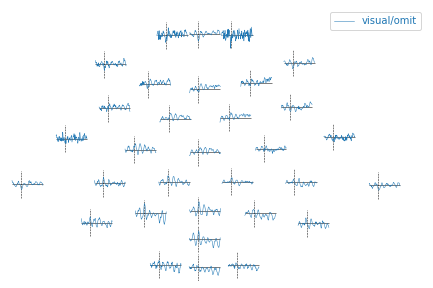

In [24]:
vis_stim_evoked.plot_topo();
vis_omit_evoked.plot_topo();

In [25]:
aud_stim_evoked.save(subject + '_AS_evoked-ave.fif')
vis_stim_evoked.save(subject + '_VS_evoked-ave.fif')
aud_omit_evoked.save(subject + '_AO_evoked-ave.fif')
vis_omit_evoked.save(subject + '_VO_evoked-ave.fif')

In [118]:
from importlib import reload
reload(plt)
%matplotlib notebook

In [121]:
%matplotlib notebook

In [ ]:
%matplotlib inline
chs = ['O2','O1','OZ','POZ']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
raw.plot(duration=10, start=2200, scalings=dict(eeg=2*20e-6),order=chan_idxs, n_channels=len(chan_idxs));

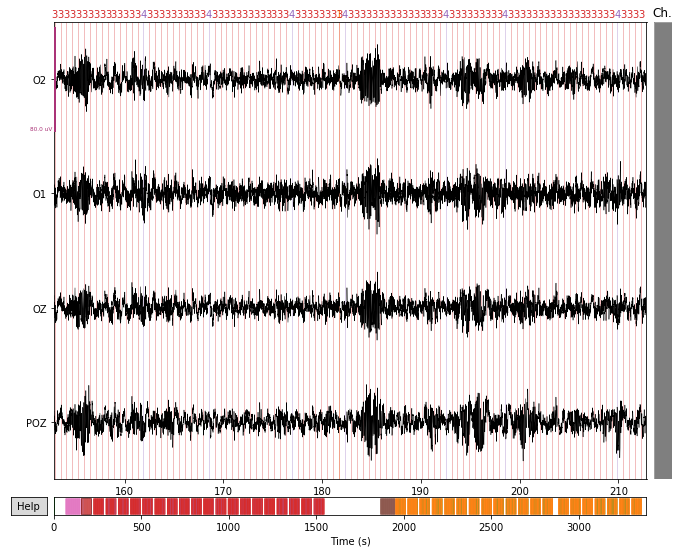

In [132]:
%matplotlib inline
chs = ['O2','O1','OZ','POZ']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
raw.plot(duration=60, start=152.85, scalings=dict(eeg=2*20e-6),order=chan_idxs, n_channels=len(chan_idxs));

Effective window size : 8.000 (s)


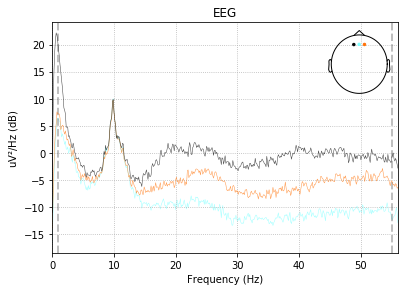

Effective window size : 8.000 (s)


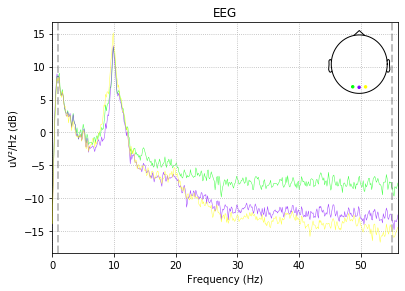

In [159]:
raw.plot_psd(fmax=56, tmin= 500, tmax=1000, picks=['FP1','FPZ','FP2']);
raw.plot_psd(fmax=56, tmin= 500, tmax=1000, picks=['O1','OZ','O2']);

Effective window size : 8.000 (s)


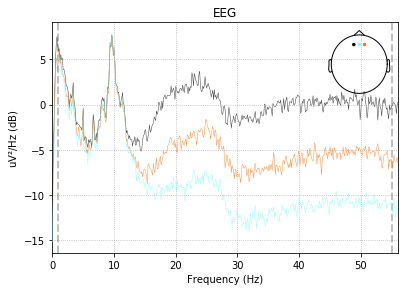

Effective window size : 8.000 (s)


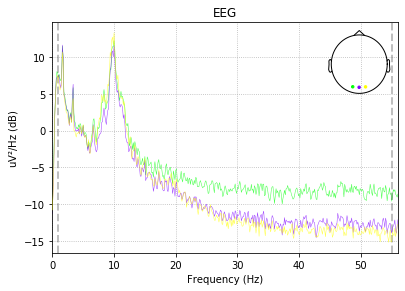

In [160]:
raw.plot_psd(fmax=56, tmin= 2000, tmax=2500, picks=['FP1','FPZ','FP2']);
raw.plot_psd(fmax=56, tmin= 2000, tmax=2500, picks=['O1','OZ','O2']);